In [ ]:
import random
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go


# Creating a Fixed Starting Point for a Simpler Library Example

In [ ]:
random.seed(42)

# Generate daily sales values with random seed
sales_data = []
for year in range(2010, 2020):
    # Define initial sales for the year
    initial_sales = 100 * (1.05 ** (year - 2010))  # Exponential growth factor
    # Generate daily sales with less oscillation
    daily_sales = [initial_sales + random.uniform(-2, 2) for _ in range(365)]
    # Append year and daily sales data
    for day, sales in enumerate(daily_sales, start=1):
        date = pd.to_datetime(f"{year}-01-01")  # Start from January 1st of the current year
        date += pd.Timedelta(days=day - 1)  # Add the current day to the date
        sales_data.append((date, sales))

# Convert data to DataFrame
df = pd.DataFrame(sales_data, columns=["Date", "Sales"])

# Display the first few rows of the DataFrame
display(df)





,Date,Sales
0,2010-01-01,100.557707
1,2010-01-02,98.100043
2,2010-01-03,99.100117
3,2010-01-04,98.892843
4,2010-01-05,100.945885
...,...,...
3645,2019-12-27,156.270050
3646,2019-12-28,156.328109
3647,2019-12-29,154.283376
3648,2019-12-30,155.790796


# Let's rename the columns to 'ds' and 'y'

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
display(df)

,ds,y
0,2010-01-01,100.557707
1,2010-01-02,98.100043
2,2010-01-03,99.100117
3,2010-01-04,98.892843
4,2010-01-05,100.945885
...,...,...
3645,2019-12-27,156.270050
3646,2019-12-28,156.328109
3647,2019-12-29,154.283376
3648,2019-12-30,155.790796


In [ ]:
len(df)

3650

# Plotting to visualize the pattern

In [ ]:
py.iplot([go.Scatter(
    x=df['ds'],
    y=df['y']
)])

# We should verify whether the columns have the correct data type. Specifically, we want the 'y' column to be of datetime type.

In [ ]:
print(df.dtypes)

ds      int64
y     float64
dtype: object


In [ ]:
#Converting to date time

df['ds'] = pd.to_datetime(df['ds'])

# Verificando o tipo de dados da coluna 'ds' após a conversão
print(df.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


# Here, we're going to execute the function and fit the entire database with m.fit()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4r41dxuh/yonk2un8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4r41dxuh/e73bsjdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3864', 'data', 'file=/tmp/tmp4r41dxuh/yonk2un8.json', 'init=/tmp/tmp4r41dxuh/e73bsjdl.json', 'output', 'file=/tmp/tmp4r41dxuh/prophet_modelbi47mjs4/prophet_model-20240414142131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:21:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:21:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


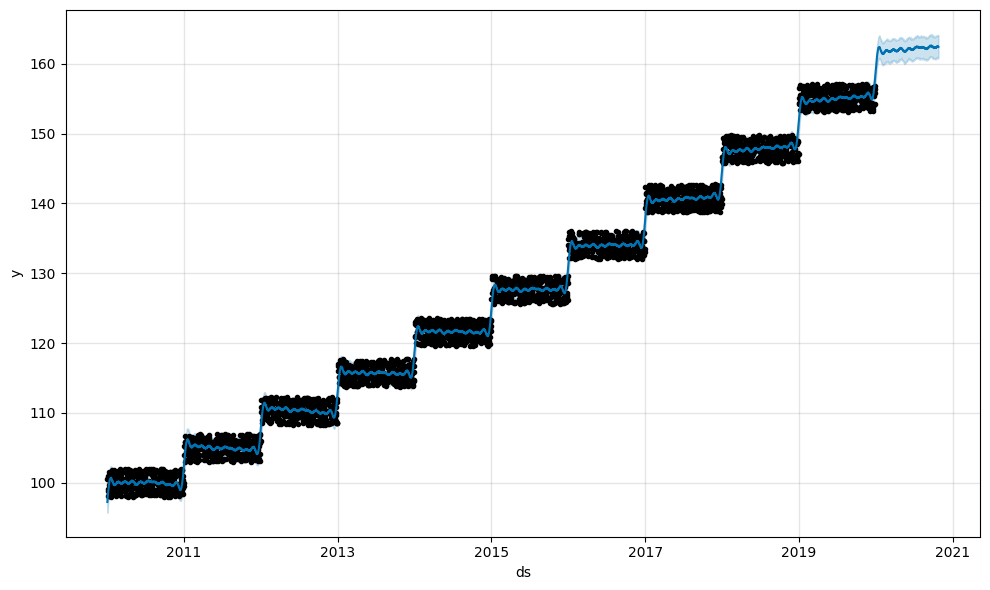

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(300, freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

# When we plot the data, it gives us a good look at the trend line and what FbProphet predicts.

In [ ]:
py.iplot([
    go.Scatter(x=df['ds'], y=df['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Calculating the Root mean square deviation

In [ ]:
print('RMSE: %f' % np.sqrt(np.mean((forecast.loc[:1682, 'yhat']-df['y'])**2)) )

RMSE: 1.206734


# Adding chance points

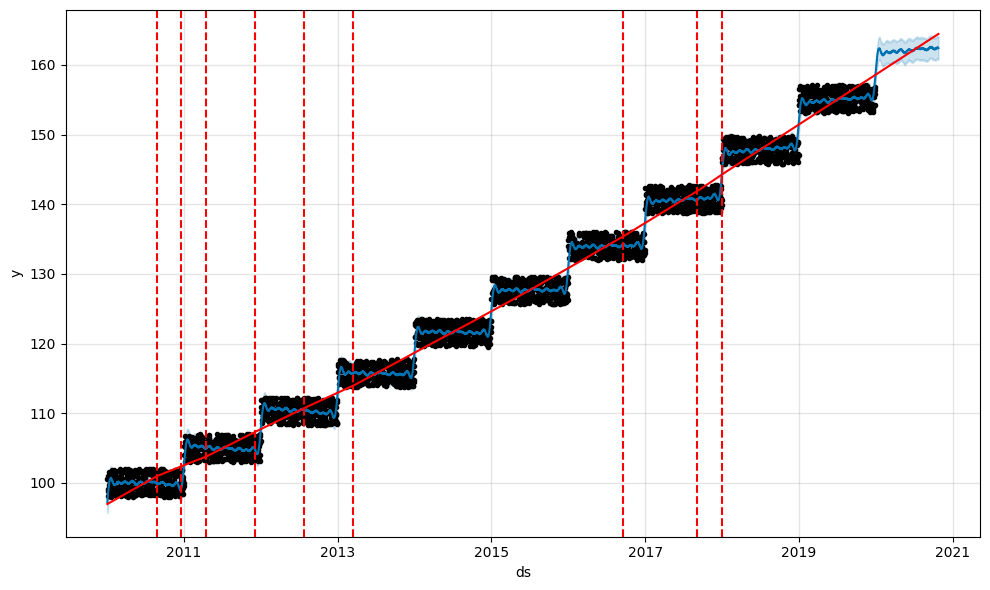

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4r41dxuh/w02vcnfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4r41dxuh/cy_31lo1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53439', 'data', 'file=/tmp/tmp4r41dxuh/w02vcnfe.json', 'init=/tmp/tmp4r41dxuh/cy_31lo1.json', 'output', 'file=/tmp/tmp4r41dxuh/prophet_model32x8tuuj/prophet_model-20240414144124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:41:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


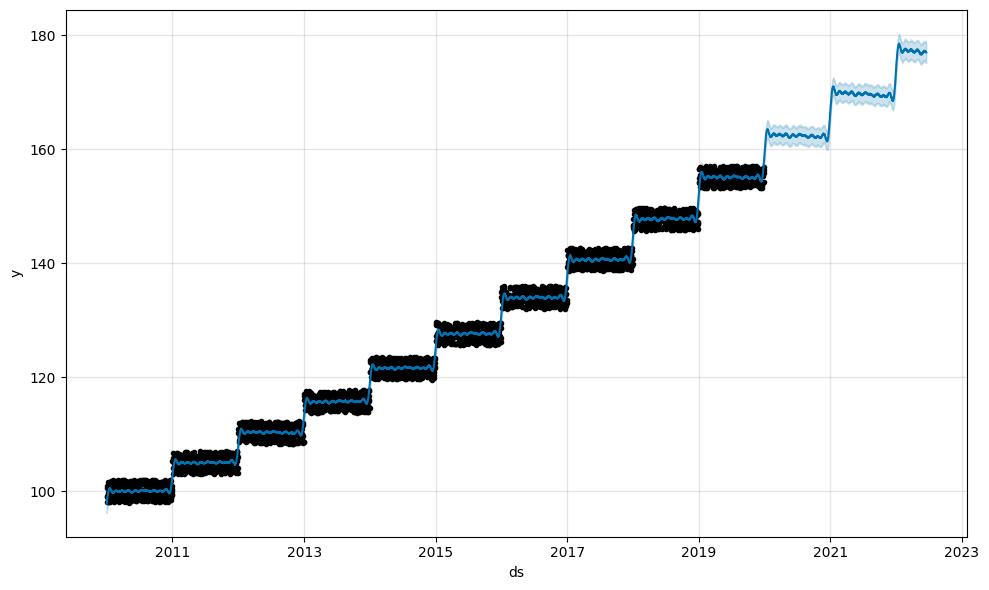

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(900, freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

# Plotting the weekly and yearly changes



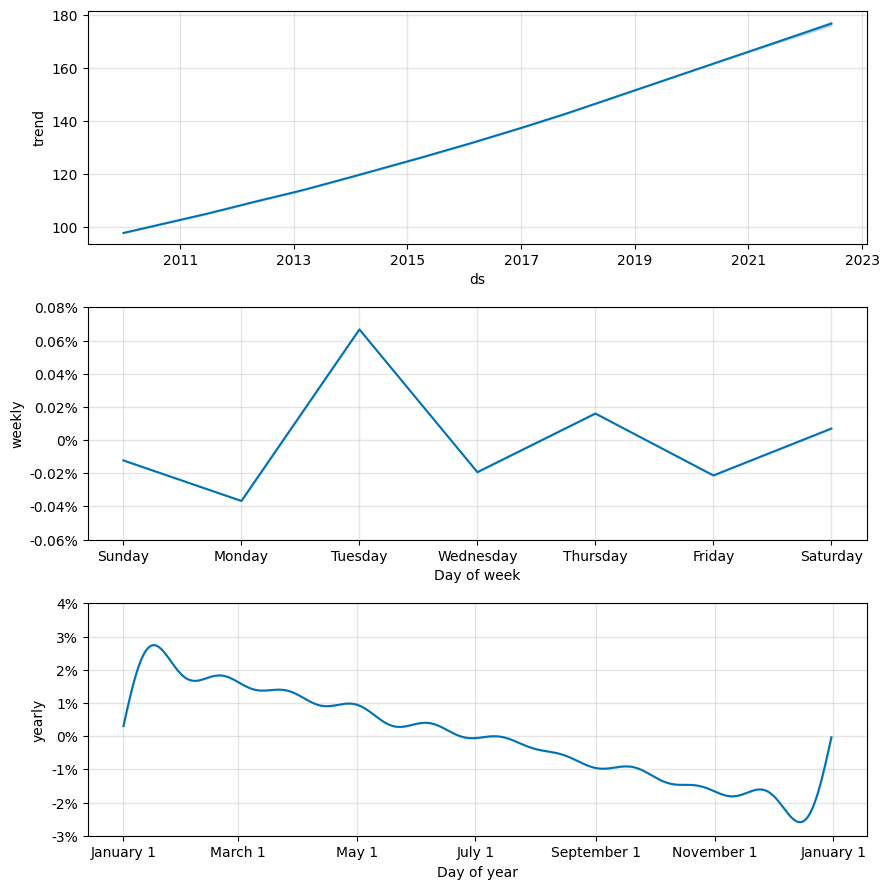

In [ ]:
fig = m.plot_components(forecast)